# INFORME ESTADÍSTICO: DATASET CURSOS UDEMY

Gonzalo López Blanquer y Eduardo Abad Zabala

A continuación vamos a analizar una base de datos de UDEMY ,donde tenemos mucha información sobre los diferentes cursos y sus características.

Como primer paso, hemos importado todas las librerías que usaremos para el documento.

Librerías como seaborn y matplotlib nos permitirán la visualización de los datos en forma de distintos gráficos.

La librería de pandas la utilizamos para el tratamiento y manipulación del dato. 

Numpy nos sirve para trabajar con cálculos numéricos y arrays.

Librerías como statsmodel.api nos sirven para profundizar más en el análisis estadístico, como a través de regresiones o pruebas de normalidad.

Scipy.stats incluye herramientas de estadística avanzada, como contraster de hipótesis, intervalos de confianza o explorar distribuciones de los datos.

Fitter nos sirve para ver a qué distribución se parece más nuestra función.



In [2]:
# INFORME ESTADÍSTICO 

import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from fitter import Fitter

# Cargamos nuestro dataset
data=pd.read_csv('udemy_courses_dataset.csv')



In [2]:
import pandas as pd

data=pd.read_csv('udemy_courses_dataset.csv')
data


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [3]:
# Describimos las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


Observamos el tipo de dato de cada variable, como el caso de num_reviews, num_lectures, num_subscribers són datos enteros (int64).

Otras variables como content_duration són de tipo float (decimal). 

La variable is_paid es de tipo booleano (yes/no).

## DESCRIPCIÓN DEL DATO


Como podemos observar, tenemos 11 variables diferentes y cada una nos ofrece una información distinta.

En cuanto al tipo de dato/variable, podemos diferenciar entre :

. CUANTITATIVAS : variables que se muestran con números 

    -Discretas : números enteros 
    
    -Continuas : numeros con decimales

. CATEGÓRICAS : variables que se muestran con etiquetas o nombres 

    -Nominativas: etiquetas

    -Ordinales: etiquetas con un orden

Analizando la tipología de las variables de nuestro dataset observamos que :

- Categóricas: subject, level, is_paid, course_id, course_title, url, published_timestamp

- Cuantitativas: price, num_subscribers, num_reviews, num_lectures, content_duration





# LIMPIEZA DEL DATO
Hemos visto que en nuestro dataset hay alguna variable que no nos aporta ningún valor, como es el caso de 'published_timestamp', 'course_id' y 'url'. Por tanto vamos a eliminarlas de nuestro dataset . De esta manera nos queda el dataset más limpio y claro .


In [4]:
data=data.drop(columns={'course_id','published_timestamp','url'})
data

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,Business Finance
...,...,...,...,...,...,...,...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,True,100,1040,14,21,All Levels,2.0,Web Development
3674,How To Design A WordPress Website With No Codi...,True,25,306,3,42,Beginner Level,3.5,Web Development
3675,Learn and Build using Polymer,True,40,513,169,48,All Levels,3.5,Web Development
3676,CSS Animations: Create Amazing Effects on Your...,True,50,300,31,38,All Levels,3.0,Web Development


# DESCRIPCIÓN UNIVARIANTE


Vamos a analizar cada variable por separado para ver características de cada una. Dependiendo del tipo de variable que sea la analizaremos de una determinada manera. En el caso de las variables categóricas en análisis se centra en el conteo y la distribución que siguen.
Y, en el caso de las variables cuantitativas vamos a describir características como la media,moda, mediana, cuartiles,desviación típica...

Primero vamos a hacer una breve descripción de cada variable, y después vamos a verlas representadas en distintos tipos de gráficos.

Las variables cuantitativas se suelen ver representadas en gráficos como  histogramas (para ver la forma de la distribución), gráficos de densidad, boxplot(para ver dispersión y outliers=valores atípicos).

Las variables categóricas se suelen ver representadas en gráficos como gráfico de barras, pie-chart.

 Empezamos con el análisis univariante de las variables categóricas : 
 

In [17]:
data['level'].value_counts()

level
All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

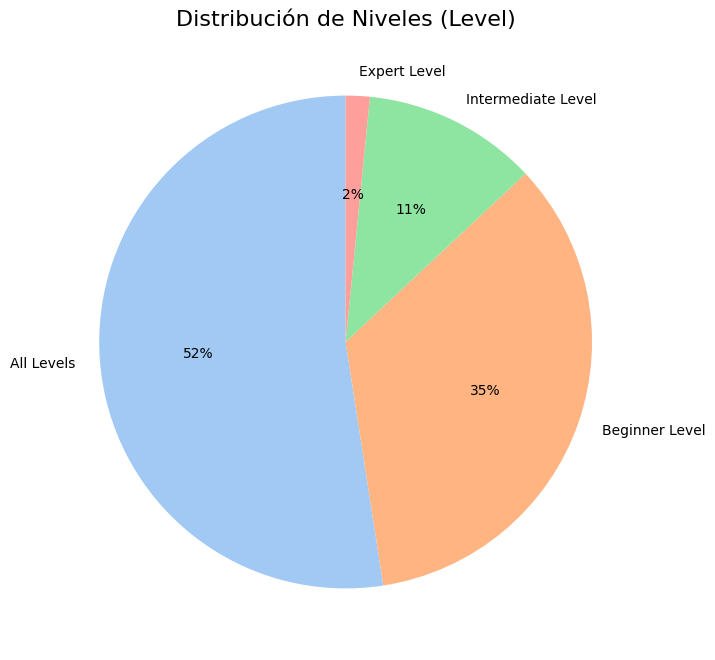

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular las frecuencias de cada categoría en 'level'
frecuencias = data['level'].value_counts()

# Definir etiquetas y colores
labels = frecuencias.index  # Etiquetas basadas en las categorías únicas
sizes = frecuencias.values  # Frecuencias de las categorías
colors = sns.color_palette('pastel')[0:len(labels)]  # Colores para cada porción

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,  # Valores para el gráfico (frecuencias)
    labels=labels,  # Etiquetas de las categorías
    colors=colors,  # Colores definidos
    autopct='%.0f%%',  # Mostrar porcentajes con 0 decimales
    startangle=90  # Girar el inicio del gráfico para mejor visualización
)

# Título del gráfico
plt.title('Distribución de Niveles (Level)', fontsize=16)
plt.show()


A través del piechart comprobamos que la variable 'level' está compuesta mayoritariamente por 'All Levels' (52 %) seguida de ' Beginner Level' (35%), ' Intermediate Level' (11%) y por último 'Expert Level' (2%).

Por lo tanto, los cursos de Udemy principalmente van dirigidos a todos los niveles, aunque tienen más cursos para principiantes que para expertos.


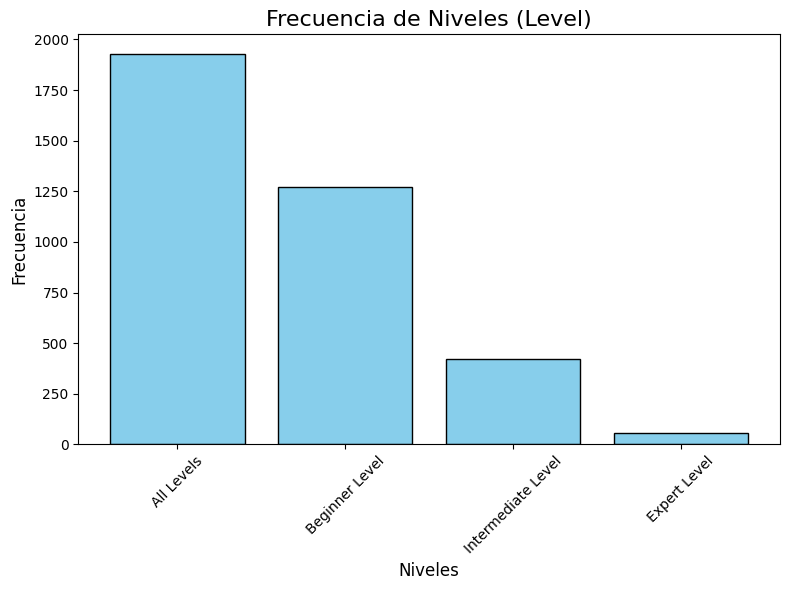

In [12]:
# Gráfico de barras

import matplotlib.pyplot as plt

# Calcular las frecuencias de cada categoría en 'level'
frecuencias = data['level'].value_counts()

# Extraer etiquetas (categorías) y tamaños (frecuencias)
labels = frecuencias.index  # Etiquetas de las categorías
sizes = frecuencias.values  # Frecuencias de las categorías

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title('Frecuencia de Niveles (Level)', fontsize=16)
plt.xlabel('Niveles', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.tight_layout()  # Ajustar para evitar que se corten las etiquetas

plt.show()


In [24]:
data['is_paid'].value_counts()

is_paid
True     3368
False     310
Name: count, dtype: int64

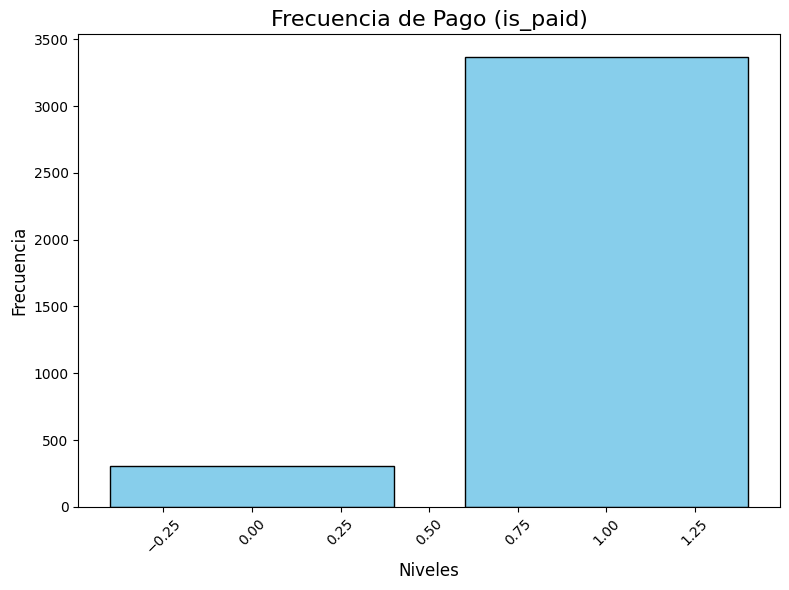

In [25]:
import matplotlib.pyplot as plt

# Calcular las frecuencias de cada categoría en 'level'
frecuencias = data['is_paid'].value_counts()

# Extraer etiquetas (categorías) y tamaños (frecuencias)
labels = frecuencias.index  # Etiquetas de las categorías
sizes = frecuencias.values  # Frecuencias de las categorías

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title('Frecuencia de Pago (is_paid)', fontsize=16)
plt.xlabel('Niveles', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.tight_layout()  # Ajustar para evitar que se corten las etiquetas

plt.show()


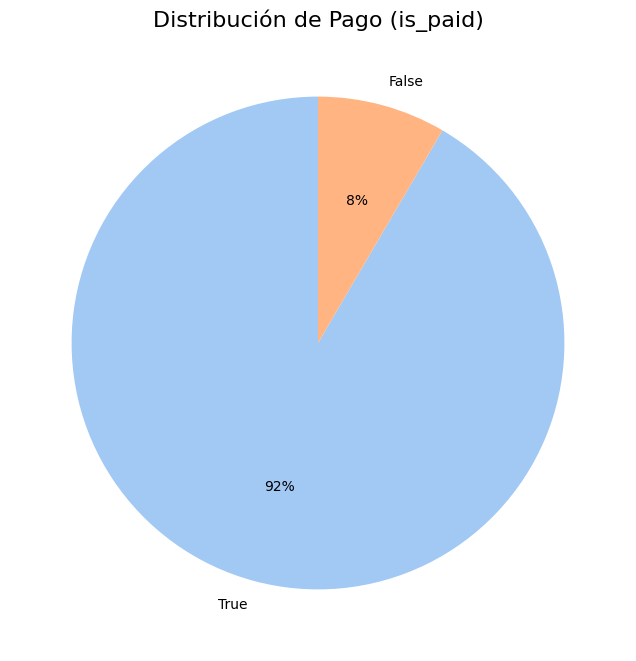

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular las frecuencias de cada categoría en 'level'
frecuencias = data['is_paid'].value_counts()

# Definir etiquetas y colores
labels = frecuencias.index  # Etiquetas basadas en las categorías únicas
sizes = frecuencias.values  # Frecuencias de las categorías
colors = sns.color_palette('pastel')[0:len(labels)]  # Colores para cada porción

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,  # Valores para el gráfico (frecuencias)
    labels=labels,  # Etiquetas de las categorías
    colors=colors,  # Colores definidos
    autopct='%.0f%%',  # Mostrar porcentajes con 0 decimales
    startangle=90  # Girar el inicio del gráfico para mejor visualización
)

# Título del gráfico
plt.title('Distribución de Pago (is_paid)', fontsize=16)
plt.show()

In [32]:
data['subject'].value_counts()

subject
Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

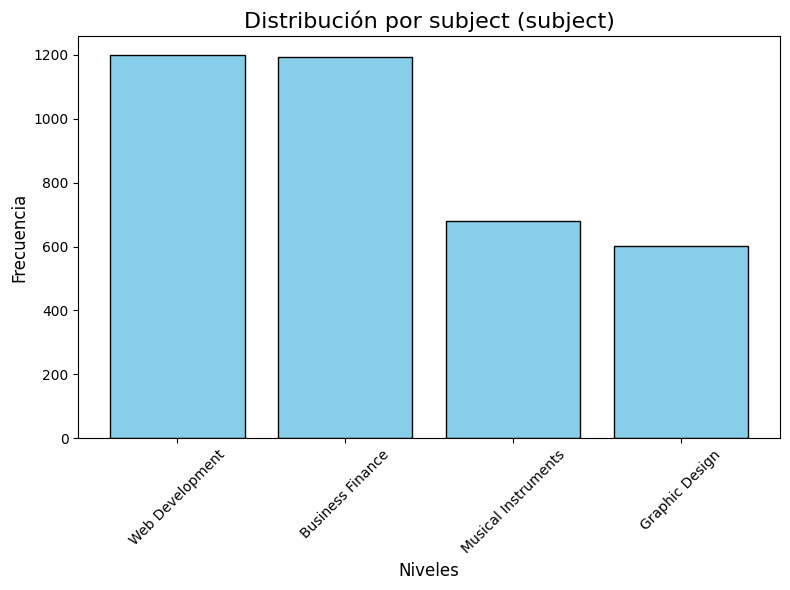

In [33]:
import matplotlib.pyplot as plt

# Calcular las frecuencias de cada categoría en 'level'
frecuencias = data['subject'].value_counts()

# Extraer etiquetas (categorías) y tamaños (frecuencias)
labels = frecuencias.index  # Etiquetas de las categorías
sizes = frecuencias.values  # Frecuencias de las categorías

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title('Distribución por subject (subject)', fontsize=16)
plt.xlabel('Niveles', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.tight_layout()  # Ajustar para evitar que se corten las etiquetas

plt.show()

# DESCRIPCIÓN BIVARIANTE
data= df.drop(columns=['url', 'published_timestamp'], axis=1)
data


In [35]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         3678 non-null   int64  
 1   course_title      3678 non-null   object 
 2   is_paid           3678 non-null   bool   
 3   price             3678 non-null   int64  
 4   num_subscribers   3678 non-null   int64  
 5   num_reviews       3678 non-null   int64  
 6   num_lectures      3678 non-null   int64  
 7   level             3678 non-null   object 
 8   content_duration  3678 non-null   float64
 9   subject           3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 262.3+ KB


### Naturaleza de los datos

- Variables categóricas --> is_paid, level, subject
- Variables cuantitativas:
  - Variables discretas --> price, num_suscribers, num_reviews, num_lectures 
  - Variables continuas --> content_duration


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.020286,1090.469969,1115.310466,inf,0.211177,2.147902e-144
expon,0.020328,1144.884119,1157.304367,inf,0.176971,3.123042e-101
norm,0.021396,1130.513440,1142.933689,inf,0.241073,1.272299e-188
gamma,0.023157,1272.842744,1291.473118,inf,0.468402,0.000000e+00


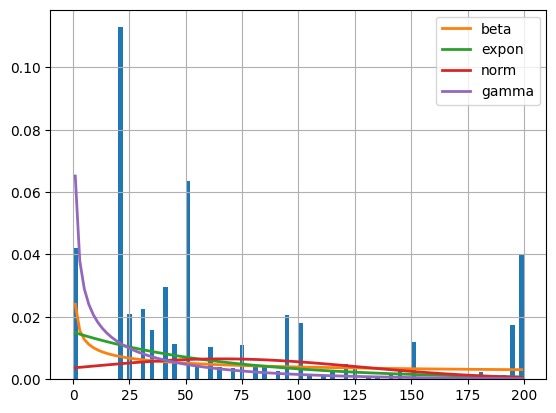

c:\Users\eduab\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\eduab\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6554: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
c:\Users\eduab\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Mejor distribución: beta
Parámetros: (0.6062736129649037, 0.9921910509055593, -1.740427898558937e-27, 202.5832648612008)


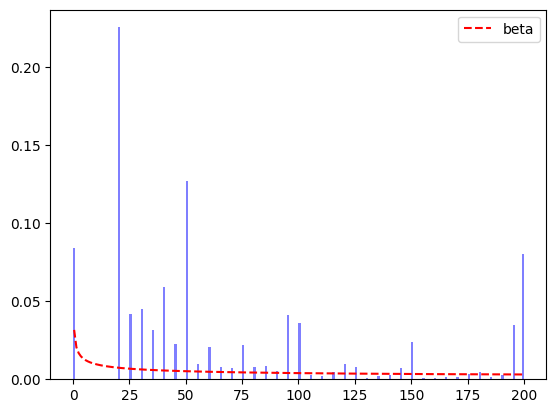

In [14]:
# PARA VER QUÉ DISTRIBUCIÓN ES LA MÁS PARECIDA A LOS DATOS
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


# Definir la función best_fit_distribution
def best_fit_distribution(data, bins=200, plot=False):
    DISTRIBUTIONS = [st.norm, st.expon, st.gamma, st.weibull_min, st.weibull_max, st.beta, st.lognorm]

    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    best_distribution = None
    best_params = None
    best_sse = np.inf

    for distribution in DISTRIBUTIONS:
        try:
            params = distribution.fit(data)
            pdf = distribution.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
            sse = np.sum(np.power(y - pdf, 2.0))

            if best_sse > sse > 0:
                best_distribution = distribution
                best_params = params
                best_sse = sse
        except Exception:
            pass
    if best_distribution:
        print(f"Mejor distribución: {best_distribution.name}")
        print(f"Parámetros: {best_params}")

        if plot:
            plt.hist(data, bins=bins, density=True, alpha=0.5, color='b')
            pdf = best_distribution.pdf(x, *best_params[:-2], loc=best_params[-2], scale=best_params[-1])
            plt.plot(x, pdf, 'r--', label=f'{best_distribution.name}')
            plt.legend()
            plt.show()

    return best_distribution, best_params

# Llamada a la función con una columna específica
mejor_distribucion, parametros = best_fit_distribution(data["price"], plot=True)



In [15]:
data

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,1070968,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,Business Finance
...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,True,100,1040,14,21,All Levels,2.0,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,True,25,306,3,42,Beginner Level,3.5,Web Development
3675,635248,Learn and Build using Polymer,True,40,513,169,48,All Levels,3.5,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,True,50,300,31,38,All Levels,3.0,Web Development


In [16]:
# MATRIZ CORRELACIONAL
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que tus variables son numéricas donde sea necesario
# Convertir 'is_paid' y 'level' si son categóricas, por ejemplo:
data['is_paid'] = data['is_paid'].astype(int)  # 1 para True, 0 para False
data['level'] = data['level'].astype('category').cat.codes  # Convertir a códigos numéricos

# Seleccionar las variables para la matriz de correlación
variables_correlacion = ['is_paid', 'num_subscribers', 'num_reviewers', 'level']
correlation_matrix = data[variables_correlacion].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlación')
plt.show()


KeyError: "['num_reviewers'] not in index"

In [7]:
data['price'].describe()

count    3678.000000
mean       66.049483
std        61.005755
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

En PRICE : no sigue una D. Normal ( media y mediana no coinciden, histograma,boxplot y  densityplot no són simétricas)
Hemos visto que hay muchos más valores a la derecha que a la izq= hay más precios altos que bajos.
Podría seguir una D. Poisson ( por los valores atípicos)

en NUM_SUBSCRIBERS :  no sigue una Normal, media y mediana muy diferentes, y el histograma y boxplot no muestran una forma d enormal. 
Podría seguir una D.Poisson ( por muchos outliers)

en NUM_REVIEWS : LO MISMO

NUM_LECTURES :  LO MISMO







In [8]:
data['level'].describe()

count           3678
unique             4
top       All Levels
freq            1929
Name: level, dtype: object

In [14]:
data.groupby('subject')['subject'].count()

subject
Business Finance       1195
Graphic Design          603
Musical Instruments     680
Web Development        1200
Name: subject, dtype: int64

In [4]:
# Describimos la variable price ( v.cuantitativa)
data['price'].describe()

count    3678.000000
mean       66.049483
std        61.005755
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

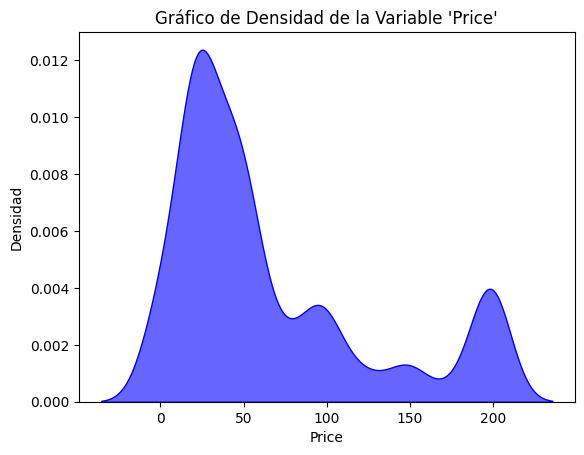

In [45]:
# Visualizamos variable price en DensityPlot
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de densidad para la variable 'price'
sns.kdeplot(data=data, x='price', fill=True, color="blue", alpha=0.6)
plt.title("Gráfico de Densidad de la Variable 'Price'")
plt.xlabel("Price")
plt.ylabel("Densidad")
plt.show()



#

NUM_SUBSCRIBERS: media!=mediana

<Axes: title={'center': 'Histograma con pandas'}, ylabel='Frequency'>

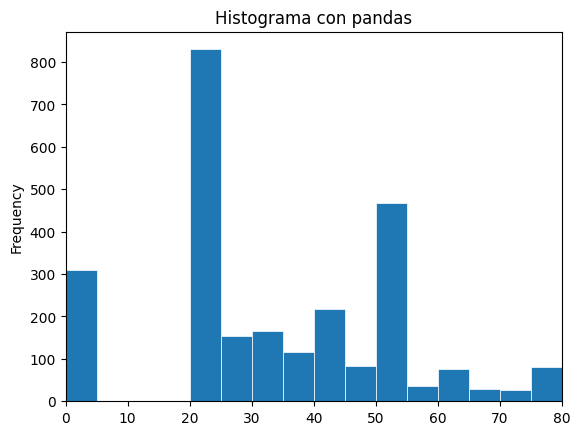

In [9]:
# Visualizamos PRICE en histograma
data["price"].plot(kind='hist',bins=40, linewidth=0.5, edgecolor="white", title = "Histograma con pandas", xlim=(0, 80))

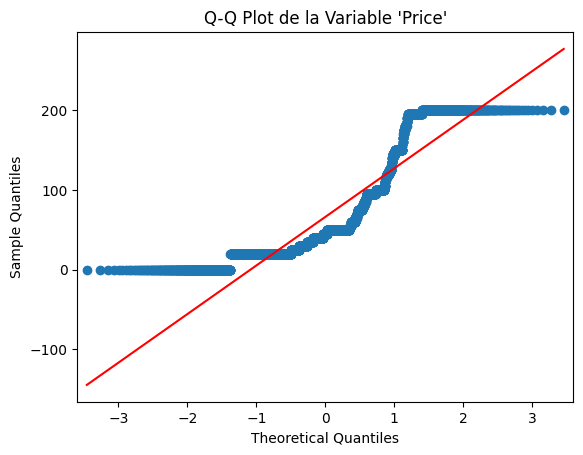

In [10]:
# PROBAR QQPLOT


# Q-Q plot para la variable 'price'
sm.qqplot(data['price'], line='s')
plt.title("Q-Q Plot de la Variable 'Price'")
plt.show()


In [ ]:
from fitter import Fitter
f=Fitter(data['price'],distributions=['norm','expon','gamma','beta'])
f.fit()
f.summary()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14532\2280665242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='is_paid', palette='viridis')


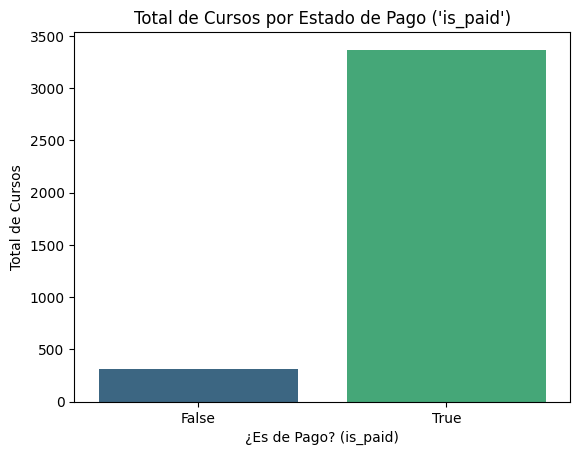

In [14]:



# Gráfico de barras: total de cursos por 'is_paid'
sns.countplot(data=data, x='is_paid', palette='viridis')
plt.title("Total de Cursos por Estado de Pago ('is_paid')")
plt.xlabel("¿Es de Pago? (is_paid)")
plt.ylabel("Total de Cursos")
plt.show()


In [ ]:
# IS_PAID seria una variable bernoulli, ya que no sigue una d.normal, y el barplot no muestra que los sucesos tienen las mimsmas probabilidades
#(hya mucho +TRUE que false)

In [14]:
# Describimos variables cuantitativas
data['num_subscribers'].describe()

count      3678.000000
mean       3197.150625
std        9504.117010
min           0.000000
25%         111.000000
50%         911.500000
75%        2546.000000
max      268923.000000
Name: num_subscribers, dtype: float64

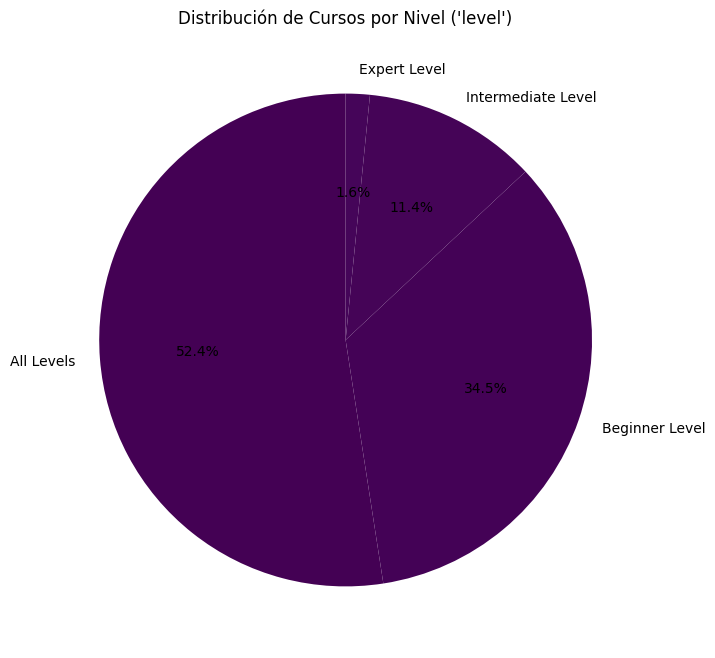

In [47]:
# PIE CHART

level_counts = data['level'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.viridis.colors)
plt.title("Distribución de Cursos por Nivel ('level')")
plt.show()

In [9]:
data['num_reviews'].describe()

count     3678.000000
mean       156.259108
std        935.452044
min          0.000000
25%          4.000000
50%         18.000000
75%         67.000000
max      27445.000000
Name: num_reviews, dtype: float64

<Axes: xlabel='price', ylabel='num_subscribers'>

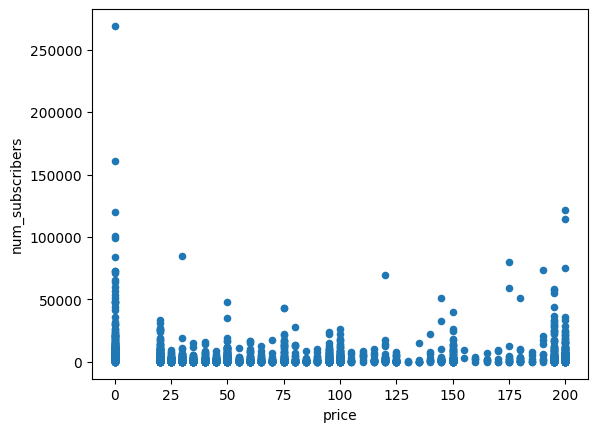

In [22]:
# Visualizamos dos variables en ScatterPlot
data.plot(x='price', y='num_subscribers', kind='scatter')


In [3]:
data

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


CONTRASTE HIPÓTESIS


 # ESTIMACIONES


In [ ]:
# estimar si la media de subscribers de una asignatura es la misma que la media de subscribers de todas las asignaturas

In [26]:
data.groupby('subject')['num_subscribers'].mean()

subject
Business Finance       1563.774895
Graphic Design         1763.097844
Musical Instruments    1245.130882
Web Development        6650.476667
Name: num_subscribers, dtype: float64

In [29]:
data['num_subscribers'].mean()

3197.150625339859

In [32]:
from scipy.stats import ttest_1samp

# Definir el nombre de la categoría específica que deseas analizar
categoria_especifica = 'Graphic Design'

# Filtrar los datos de la categoría específica
grupo_especifico = data[data['subject'] == categoria_especifica]['num_subscribers']

# Calcular la media general de num_subscribers
media_general = data['num_subscribers'].mean()

# Realizar el test t para una muestra
stat, p_value = ttest_1samp(grupo_especifico, popmean=media_general)

# Mostrar resultados
print(f"Media de {categoria_especifica}: {grupo_especifico.mean():.2f}")
print(f"Media general: {media_general:.2f}")
print(f"Estadístico t: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación
if p_value < 0.05:
    print(f"La media de '{categoria_especifica}' es significativamente diferente de la media general.")
else:
    print(f"No hay evidencia suficiente para decir que la media de '{categoria_especifica}' es diferente de la media general.")


Media de Graphic Design: 1763.10
Media general: 3197.15
Estadístico t: -7.1528
Valor p: 0.0000
La media de 'Graphic Design' es significativamente diferente de la media general.


Como hemos podido observar en un primer momento, la media de suscriptores de todas las asignaturas era bastante diferente de la media de suscriptores en una asignatura en concreto ( Graphic Design). Pero aún así hemos hecho la estimación, y nos aseguramos viendo el pValor tan bajo, por lo tanto rechazamos la hipótesis nula de que la media de suscriptores de una asignatura es la misma que la media de suscriptores de todas las asignaturas.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21848\1656741197.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='subject', y='num_subscribers', palette='Set2')


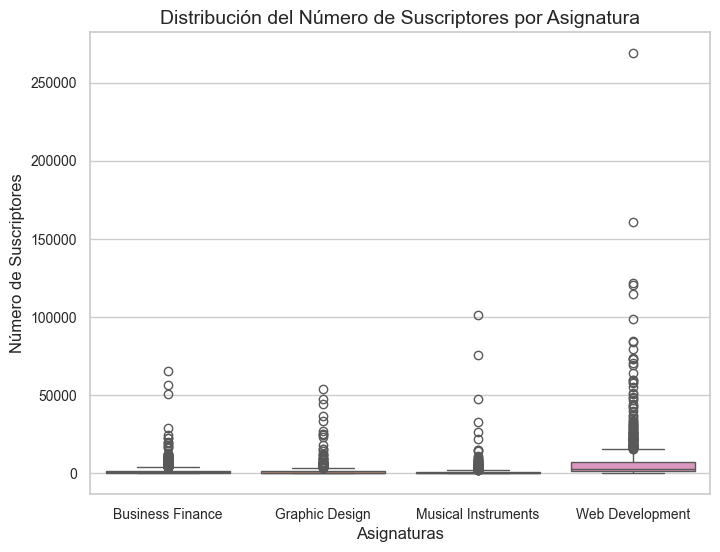

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='subject', y='num_subscribers', palette='Set2')

# Personalizar el gráfico
plt.title('Distribución del Número de Suscriptores por Asignatura', fontsize=14)
plt.xlabel('Asignaturas', fontsize=12)
plt.ylabel('Número de Suscriptores', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.show()


In [23]:
data.groupby('subject')['num_subscribers'].mean()

subject
Business Finance       1563.774895
Graphic Design         1763.097844
Musical Instruments    1245.130882
Web Development        6650.476667
Name: num_subscribers, dtype: float64

In [17]:
from scipy.stats import kruskal
import pandas as pd

# Asegúrate de que tu dataset ya está cargado en tu variable (por ejemplo, `tu_dataset`)

# Crear listas separadas para cada grupo de subjects
groups = [group['num_subscribers'].values for name, group in data.groupby('subject')]

# Realizar el test de Kruskal-Wallis
stat, p_value = kruskal(*groups)

# Mostrar resultados
print("Estadístico de Kruskal-Wallis:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos (rechazamos H0).")
else:
    print("No hay diferencias significativas entre los grupos (no se rechaza H0).")


Estadístico de Kruskal-Wallis: 1001.6004591500682
Valor p: 8.08991636213762e-217
Hay diferencias significativas entre los grupos (rechazamos H0).


TUKEY test


In [ ]:
# Como hemos visto previamente ( rechazando Ho), NO había el nivel de significancia necesario para asumir la estimación, por tanto pasamos a hacer la siguiente prueba KruskalWalis para ver cuál de las subjects era diferente al resto.

# Como podemos observar en el Kruskal-Wallis , el pvalor es MUY BAJO, por tanto  RECHAZAMOS  Ho
# Por tanto, concluimos con que las SUBJECT no tienen una media similar de NUM_SUBSCRIBERS 
# Al no seguir una distribución normal la variable (num_subscribers), hemos hecho la prueba KRUSKAL-WALLIS 
# Hemos visto las medias de num_subscribers en cada subject,  WEB DEVELOPMENT tiene una media bastante más alta

# Por tanto todas las subjects tienen una media relativamente similar, excepto WEB DEVELOPMENT que es bastante más grande

